In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob

(8192, 3)

r = [-0.00279637 -0.01160501 -0.03966212]
h =  0.07664944
h/2 =  0.03832472115755081
v =  [ 0.08926417 -0.06118938  0.8378198 ]
rho =  5.991939


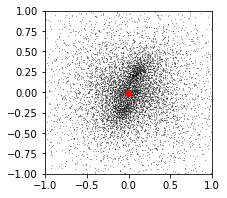

In [10]:
file = h5py.File('../Testing_Auto_timestep/output_8k_0.5m_Gadget//snap_1610.hdf5', 'r')

coord = r = file['PartType0']['Coordinates']
h = file['PartType0']['SmoothingLength']
rho = list(file['PartType0']['Density'])
v = file['PartType0']['Velocities']

ids = file['PartType0']['ParticleIDs']
ids = np.array([int(x) for x in ids])

#j = 320

nid = np.where(ids == 7159)[0]
#print('nid = ', nid)
#print(ids[j])
#print()

j = int(nid)

print(coord.shape)
print()

print(f'r = {coord[j, :]}')
print('h = ', h[j])
print('h/2 = ', h[j]/2)
print('v = ', v[j, :])
print('rho = ', rho[j])

plt.figure(figsize = (3, 3))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.02, color = 'black')
plt.plot(coord[j, 0], coord[j, 1], marker = 'o', color = 'red')
xyrange = 1.0
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange);

### Find the number of particles inside a sphere of radius `h`

In [3]:
dx = r[j, 0] - r[:, 0]
dy = r[j, 1] - r[:, 1]
dz = r[j, 2] - r[:, 2]

dd = (dx*dx + dy*dy + dz*dz)**0.5

print(sum(dd <= h)) # Note that it is 1.0*h and not 2.0*h !

60


# Density profile

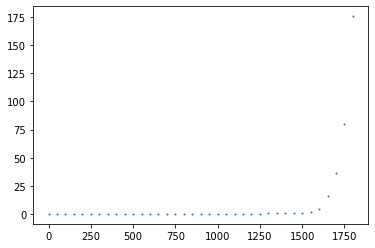

In [19]:


filez = np.sort(glob.glob('../Testing_Auto_timestep/output_8k_0.5m_Gadget/*.hdf5'))

lst = []

for i in range(0, len(filez), 50):
    
    file = h5py.File('../Testing_Auto_timestep/output_8k_0.5m_Gadget//snap_' + str(i).zfill(3) + '.hdf5', 'r')
    
    #file = h5py.File(filez[i], 'r')

    rho = list(file['PartType0']['Density'])

    ids = file['PartType0']['ParticleIDs']
    ids = np.array([int(x) for x in ids])
    nid = np.where(ids == 7159)[0]
    j = int(nid)

    lst.append([i, rho[j]])

lst = np.array(lst)

plt.scatter(lst[:, 0], lst[:, 1], s = 1);